# Regression : Ridge Regression (interpretation)

In this notebook, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
* Use a pre-built implementation of regression (sklearn Create) to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a pre-built implementation of regression (sklearn Create) to run polynomial regression, this time with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.

We will continue to use the House data from previous notebooks.  (In the next programming assignment for this module, you will implement your own ridge regression learning algorithm using gradient descent.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Polynomial regression, revisited

We build on the material from Week 3, where we wrote the function to produce an DataFrame with columns containing the powers of a given input. Copy and paste the function `polynomial_frame` from Week 3:

In [2]:
def polynomial_frame(feature, degree):
    poly_frame=pd.DataFrame()
    poly_frame['power_1']=feature
    if degree>1:
        for power in range(1,degree+1):
            name='power_'+str(power)
            poly_frame[name]=feature**power
    return poly_frame
        
    

Let's use matplotlib to visualize what a polynomial regression looks like on the house data.

In [5]:
sales = pd.read_csv('kc_house_data.csv')
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

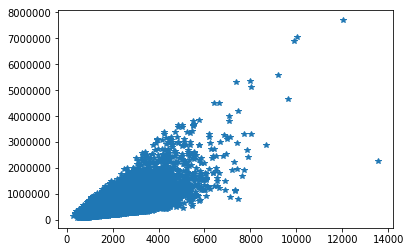

In [9]:
plt.plot(sales['sqft_living'],sales['price'],'*')

(array([7.5690e+03, 1.0681e+04, 2.8140e+03, 4.4100e+02, 7.7000e+01,
        2.4000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  290.,  1615.,  2940.,  4265.,  5590.,  6915.,  8240.,  9565.,
        10890., 12215., 13540.]),
 <a list of 10 Patch objects>)

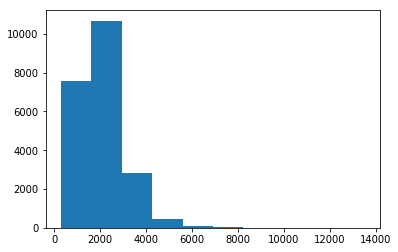

In [13]:
plt.hist(sales['sqft_living'])


In [16]:
sales = sales.sort_values(['sqft_living','price'])
#sales =sales['sqft_living','price'].sort()
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
21332,9266700190,20150511T000000,245000.0,1,1.00,390,2000,1.0,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340,5100
8623,6303400395,20150130T000000,325000.0,1,0.75,410,8636,1.0,0,0,...,4,410,0,1953,0,98146,47.5077,-122.357,1190,8636
11500,4322200105,20150331T000000,229050.0,1,1.00,420,3298,1.0,0,0,...,4,420,0,1949,0,98136,47.5375,-122.391,1460,4975
14466,7549801385,20140612T000000,280000.0,1,0.75,420,6720,1.0,0,0,...,5,420,0,1922,0,98108,47.5520,-122.311,1420,6720
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [19]:
x = sales.drop(['id' , 'price','date'] ,axis =1)
#x= pd.DataFrame(x) # no need of it 
y = pd.DataFrame(sales['price'])
print(x.shape,y.shape)
print(x,y)

(21613, 18) (21613, 1)
       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
19452         0       0.00          290     20875     1.0           0     0   
15381         1       0.75          370      1801     1.0           0     0   
860           1       0.75          380     15000     1.0           0     0   
18379         0       0.75          384    213444     1.0           0     0   
4868          0       1.00          390      5900     1.0           0     0   
21332         1       1.00          390      2000     1.0           0     0   
8623          1       0.75          410      8636     1.0           0     0   
11500         1       1.00          420      3298     1.0           0     0   
14466         1       0.75          420      6720     1.0           0     0   
465           1       0.75          430      5050     1.0           0     0   
1168          2       0.75          440      8313     1.0           1     3   
18052         1       1.00   

In [20]:
from sklearn.linear_model import LinearRegression , Ridge

R_model =Ridge(alpha= 1)
#s.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

R_model.fit(x,y)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
R_model.coef_

array([[-3.57944075e+04,  4.11464602e+04,  1.10460160e+02,
         1.27920507e-01,  6.76398551e+03,  5.78671190e+05,
         5.30407823e+04,  2.63684072e+04,  9.59482521e+04,
         7.07463013e+01,  3.97128825e+01, -2.62320465e+03,
         1.98324073e+01, -5.80431790e+02,  6.00972410e+05,
        -2.13749447e+05,  2.16540819e+01, -3.83125327e-01]])

In [22]:
R_model.intercept_

array([6705162.08775925])

In [23]:
y_pred = R_model.predict(x)
print(y_pred)

[[-511616.27967972]
 [ 231927.44727045]
 [ -91730.36801325]
 ...
 [3195905.65663434]
 [3367654.29874014]
 [3197453.16562229]]


In [30]:
def polynomial_ridge_regression(data,deg ,output , L2_penalty):
    
    poly_frame=polynomial_frame(data['sqft_living'],deg) # only sqft_living feature is selected
    #print(poly_frame)
    my_features=poly_frame.columns
    output = output
    ss=Ridge(alpha=L2_penalty)
    ss.fit(poly_frame, output)
    
    return ss

Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_frame()` and fit a model with these features. When fitting the model, use an L2 penalty of `1e-5`:

In [31]:
l2_small_penalty = 1e-5

Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results.  Thus, rather than using no regularization, we will introduce a tiny amount of regularization (`l2_penalty=1e-5`) to make the solution numerically stable.  (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)

With the L2 penalty specified above, fit the model and print out the learned weights.

Hint: make sure to add 'price' column to the new DataFrame before calling `sklearn.LinearRegression`. Also, make sure sklearn Create doesn't create its own validation set by using the option `validation_set=None` in this call.

In [32]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,1,0.75,370,1801,1.0,0,0,5,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
21332,1,1.00,390,2000,1.0,0,0,4,6,390,0,1920,0,98103,47.6938,-122.347,1340,5100
8623,1,0.75,410,8636,1.0,0,0,2,4,410,0,1953,0,98146,47.5077,-122.357,1190,8636
11500,1,1.00,420,3298,1.0,0,0,4,4,420,0,1949,0,98136,47.5375,-122.391,1460,4975
14466,1,0.75,420,6720,1.0,0,0,3,5,420,0,1922,0,98108,47.5520,-122.311,1420,6720
465,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [33]:
model=polynomial_ridge_regression(x ,15, y ,1e-5)
model.coef_


C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.057730e-34
  overwrite_a=True).T


array([[ 7.21924312e+01,  1.28784550e-02,  8.79729440e-06,
        -6.34216415e-10, -1.93870259e-14, -1.56852046e-16,
        -4.59549424e-16,  3.42171231e-16, -1.99017782e-16,
        -2.50331936e-16,  2.19637692e-16,  6.74866893e-16,
         4.48269462e-16, -4.08361862e-16,  6.67469145e-17]])

 What's the learned value for the coefficient of feature `power_1`?

# Observe overfitting

Recall from Week 3 that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a *high variance*. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Week 3.

First, split the data into split the sales data into four subsets of roughly equal size and call them `set_1`, `set_2`, `set_3`, and `set_4`. Use `.train_test_split` function and make sure you set `seed=0`. 

In [34]:
from sklearn.model_selection import train_test_split

#sets are changed to x_train and x_test 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.5,random_state=40)

x_train1,x_test1,y_train1,y_test1 = train_test_split( x_train,y_train ,test_size =0.5, random_state=40)
(x_train2,x_test2,y_train2, y_test2) = train_test_split(x_test ,y_test ,test_size =0.5, random_state=40)

Next, fit a 15th degree polynomial on `set_1`, `set_2`, `set_3`, and `set_4`, using 'sqft_living' to predict prices. Print the weights and make a plot of the resulting model.

Hint: When calling `sklearn.LinearRegression`, use the same L2 penalty as before (i.e. `l2_small_penalty`).  Also, make sure sklearn Create doesn't create its own validation set by using the option `validation_set = None` in this call.

In [35]:
model_set1 = polynomial_ridge_regression(x_train1,15,y_train1,1e-5)
model_set1.coef_

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.695033e-35
  overwrite_a=True).T


array([[-8.15688668e+01,  8.41811318e-02, -2.51494019e-06,
        -7.82652947e-11, -3.55056466e-14,  5.20842825e-16,
        -1.14104592e-15,  5.59741578e-16,  4.75852317e-16,
        -3.27314791e-16,  6.42878013e-16,  1.39117255e-15,
        -1.73491710e-17,  8.99503954e-16,  1.36261134e-16]])

In [36]:
model_set2 = polynomial_ridge_regression(x_test1,15, y_test1,1e-5)
model_set2.coef_

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.544636e-35
  overwrite_a=True).T


array([[-6.23991141e+01,  5.62366199e-02,  8.50850485e-06,
        -1.30205957e-09, -4.63715328e-14,  1.42996551e-17,
        -5.27195950e-16,  1.12960089e-15,  5.84163218e-17,
        -5.12320864e-16,  6.92340421e-17,  1.48602417e-16,
         6.78515708e-16, -5.31281315e-16, -1.53136769e-15]])

In [37]:
model_set3 = polynomial_ridge_regression(x_train2,15,y_train2,1e-5)
model_set3.coef_

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.207260e-35
  overwrite_a=True).T


array([[ 3.43118956e+01,  3.56707851e-02,  2.20562673e-06,
        -6.65974544e-11,  2.07366151e-14, -2.04222214e-16,
        -4.45843137e-16, -3.13551236e-16, -9.44776439e-17,
         1.51207886e-17, -4.55412466e-16,  7.16544162e-16,
         3.53976204e-16, -5.20129824e-16,  2.85842923e-16]])

In [38]:
model_set4 = polynomial_ridge_regression(x_test2,15,y_test2,1e-5)
model_set4.coef_

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.108715e-34
  overwrite_a=True).T


array([[ 2.49887841e+02, -7.04867071e-02,  2.23454923e-05,
        -1.29656058e-09, -1.58743417e-14, -9.32570291e-16,
         1.94194125e-16, -2.46682642e-17, -1.05106743e-15,
        -6.81667190e-17,  3.24188794e-16,  6.14275687e-16,
         7.45806517e-16, -1.60580732e-15,  1.50104127e-15]])

The four curves should differ from one another a lot, as should the coefficients you learned.

For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature `power_1`?***  (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

# Ridge regression comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (Weights of `model15` looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)


With the argument `l2_penalty=1e5`, fit a 15th-order polynomial model on `set_1`, `set_2`, `set_3`, and `set_4`. Other than the change in the `l2_penalty` parameter, the code should be the same as the experiment above. Also, make sure sklearn Create doesn't create its own validation set by using the option `validation_set = None` in this call.

In [39]:
#increase the weight of l2_penalty from 1e-5 to 1e5 (0.00001  to 100000)

model_set1 = polynomial_ridge_regression(x_train1,15,y_train1,1e5)
model_set1.coef_



C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.731120e-35
  overwrite_a=True).T


array([[-8.10552580e+01,  8.39398141e-02, -2.47192995e-06,
        -8.07348655e-11, -3.55089978e-14,  5.21070963e-16,
        -1.14070766e-15,  5.59709180e-16,  4.75785273e-16,
        -3.27256521e-16,  6.43495737e-16,  1.39108221e-15,
        -1.73041571e-17,  8.99630384e-16,  1.36312142e-16]])

In [40]:
model_set2 = polynomial_ridge_regression(x_test1,15, y_test1,1e5)
model_set2.coef_

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.581623e-35
  overwrite_a=True).T


array([[-6.18953764e+01,  5.59834734e-02,  8.55767152e-06,
        -1.30519719e-09, -4.63790344e-14,  1.43676275e-17,
        -5.26953860e-16,  1.12961307e-15,  5.85231502e-17,
        -5.12322365e-16,  6.95422036e-17,  1.48406280e-16,
         6.78469250e-16, -5.31416448e-16, -1.53156661e-15]])

In [41]:
model_set3 = polynomial_ridge_regression(x_train2,15,y_train2,1e5)
model_set3.coef_

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.245648e-35
  overwrite_a=True).T


array([[ 3.41694320e+01,  3.57308621e-02,  2.19662830e-06,
        -6.61844574e-11,  2.07273157e-14, -2.04339771e-16,
        -4.45939600e-16, -3.13549630e-16, -9.44610344e-17,
         1.50879695e-17, -4.55617689e-16,  7.16659968e-16,
         3.53938034e-16, -5.20115113e-16,  2.85808367e-16]])

In [42]:
model_set4 = polynomial_ridge_regression(x_test2,15, y_test2,1e5)
model_set4.coef_

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.112429e-34
  overwrite_a=True).T


array([[ 2.49053743e+02, -7.01542810e-02,  2.22988948e-05,
        -1.29460512e-09, -1.59000356e-14, -9.33472389e-16,
         1.93415463e-16, -2.43762641e-17, -1.05131639e-15,
        -6.80885732e-17,  3.22667194e-16,  6.14779818e-16,
         7.45436926e-16, -1.60547085e-15,  1.50093638e-15]])

These curves should vary a lot less, now that you applied a high degree of regularization.

For the models learned with the high level of regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature `power_1`?*** (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
...<br>
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that  all observations are used for both training and validation, as we iterate over segments of data. 

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. sklearn Create has a utility function for shuffling a given DataFrame. We reserve 10% of the data as the test set and shuffle the remainder. (Make sure to use `seed=1` to get consistent answer.)

In [43]:
#here  data is splitted into two part and one part is shuffled for further process of K_fold 

x_train_valid,x_test,y_train_valid, y_test = train_test_split(x , y ,test_size=.9, random_state=40)


In [44]:
#here data is shuffled with x and y same places 

from sklearn.utils import shuffle
x_train_valid_shuffled , y_train_valid_shuffled = shuffle(x_train_valid,y_train_valid, random_state =40)


Once the data is shuffled, we divide it into equal segments. Each segment should receive `n/k` elements, where `n` is the number of observations in the training set and `k` is the number of segments. Since the segment 0 starts at index 0 and contains `n/k` elements, it ends at index `(n/k)-1`. The segment 1 starts where the segment 0 left off, at index `(n/k)`. With `n/k` elements, the segment 1 ends at index `(n*2/k)-1`. Continuing in this fashion, we deduce that the segment `i` starts at index `(n*i/k)` and ends at `(n*(i+1)/k)-1`.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [45]:
n = len(x_train_valid_shuffled)
print ('n', n)
k = 10   # 10-fold cross-validation
#both range and xrange used for list of values
for i in range(k):
    start = int((n*i)/k)
    end = int((n*(i+1))/k-1 )
    print (i, (start, end) )

n 2161
0 (0, 215)
1 (216, 431)
2 (432, 647)
3 (648, 863)
4 (864, 1079)
5 (1080, 1295)
6 (1296, 1511)
7 (1512, 1727)
8 (1728, 1943)
9 (1944, 2160)


Let us familiarize ourselves with array slicing with DataFrame. To extract a continuous slice from an DataFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of `train_valid_shuffled`. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

In [46]:
x_train_valid_shuffled[0:10] # rows 0 to 9

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12768,4,2.00,1580,8000,1.0,0,0,3,7,1040,540,1967,0,98003,47.3467,-122.304,1550,8000
8,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
8081,4,1.75,1730,7210,1.0,0,0,4,7,1010,720,1968,0,98003,47.3540,-122.315,1620,7210
5327,4,2.00,1690,8208,1.0,0,0,4,7,1210,480,1958,0,98008,47.6052,-122.126,1620,8496
8897,3,1.00,1660,8839,1.0,0,0,4,7,1660,0,1947,0,98155,47.7485,-122.300,1230,9236
17031,3,1.75,1900,5520,1.0,0,0,3,7,1280,620,1982,0,98118,47.5549,-122.292,1330,5196
12140,4,1.75,2160,4333,1.0,0,0,4,8,1260,900,1942,0,98117,47.6893,-122.388,1670,4426
13290,3,1.00,1350,7973,1.5,0,0,3,7,1350,0,1954,0,98188,47.4323,-122.292,1310,7491
20641,4,2.50,2380,4913,2.0,0,0,3,8,2380,0,2006,0,98038,47.3607,-122.038,2580,5311
375,4,2.50,3230,7331,2.0,0,0,3,10,3230,0,2004,0,98075,47.5823,-121.970,3480,7447


Now let us extract individual segments with array slicing. Consider the scenario where we group the houses in the `train_valid_shuffled` dataframe into k=10 segments of roughly equal size, with starting and ending indices computed as above.
Extract the fourth segment (segment 3) and assign it to a variable called `validation4`.

In [47]:
validation4=y_train_valid_shuffled[int(3*n/k):int(4*n/k)]

To verify that we have the right elements extracted, run the following cell, which computes the average price of the fourth segment. When rounded to nearest whole number, the average should be $536,234.

In [48]:
#print int(round(validation4['price'].mean(), 0))
validation4['price'].mean()

561663.5648148148

After designating one of the k segments as the validation set, we train a model using the rest of the data. To choose the remainder, we slice (0:start) and (end+1:n) of the data and paste them together. DataFrame has `append()` method that pastes together two disjoint sets of rows originating from a common dataset. For instance, the following cell pastes together the first and last two rows of the `train_valid_shuffled` dataframe.

In [49]:
n = len(x_train_valid_shuffled)
first_two = x_train_valid_shuffled[0:2]
#print (first_two)
last_two = x_train_valid_shuffled[n-2:n]
#print (last_two)
print (first_two.append(last_two) )

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
12768         4        2.0         1580      8000     1.0           0     0   
8             3        1.0         1780      7470     1.0           0     0   
17645         3        1.0         1580      8240     1.0           0     0   
5334          2        1.0         2160      2192     1.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
12768          3      7        1040            540      1967             0   
8              3      7        1050            730      1960             0   
17645          4      7        1040            540      1978             0   
5334           5      8        1170            990      1925             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
12768    98003  47.3467 -122.304           1550        8000  
8        98146  47.5123 -122.337           1780        8113  
17645    98030  47.3542 -12

Extract the remainder of the data after *excluding* fourth segment (segment 3) and assign the subset to `train4`.

In [50]:
y_train4 = y_train_valid_shuffled[0:int(3*n/k)].append(y_train_valid_shuffled[int(4*n/k):n])
y_train4['price'].mean() #use int( ) to show upto values only

540985.9069408741

To verify that we have the right elements extracted, run the following cell, which computes the average price of the data with fourth segment excluded. When rounded to nearest whole number, the average should be $539,450.

In [51]:
print (int(round(y_train4['price'].mean(), 0)) )

540986


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
  * Compute starting and ending indices of segment i and call 'start' and 'end'
  * Form validation set by taking a slice (start:end+1) from the data.
  * Form training set by appending slice (end+1:n) to the end of slice (0:start).
  * Train a linear model using training set just formed, with a given l2_penalty
  * Compute validation error using validation set just formed

In [52]:
def k_fold_cross_validation(k, l2_penalty, data, output ):
    n=len(data)
    min_mse = None # mse is error which is least has best l2 penalty value
    l2_penalty_mse=[]
    l2_mse = []
    bestl2_penalty=None
    for l2 in l2_penalty:
        next_mse=0
        for i in range(k):
            start = int(n*i/k)
            end   = int(n*(i+1)/k-1)
            print('start point :: ', start , 'end point  :: ', end , 'l2 = ' ,l2)
            validation_set = data[start:end+1]
            valid_output   = output[start:end+1]
            #print(validation_set.shape ,valid_output.shape)
            
            #here data is divided into two parts every time its ouput also divide in same way for train and prediction
            
            training_set = data[0:start].append(data[end:n])
            train_output  = output[0:start].append(output[end:n])
            #print(training_set.shape , train_output.shape)
            model = Ridge(alpha = l2)
            model.fit(training_set,train_output )
            RSS = ((valid_output - model.predict(validation_set)) ** 2).sum()
            #print('RSS::::',RSS)

            next_mse += RSS 
            print('mse::' ,next_mse)
            l2_mse.append((l2, next_mse))
            #l2_penalty_mse.append((l2, next_mse/k))
            
        l2_penalty_mse.append((next_mse/k))
    bestl2_penalty = sorted(l2_mse)
    print(bestl2_penalty)
    
    return bestl2_penalty, l2_penalty_mse ,l2_mse
# this are to check validation_set[output_name], model.predict(validation_set)
               


In [53]:
bs_pen = pd.DataFrame(l2_mse,columns=['l2','mse'])
#print(bs_pen)
#bestl2_penalty = sorted(bs_pen) 
bestl2_penalty = bs_pen.sort_values(['mse'],axis=1)    


if (next_mse < min_mse):
    min_mse = next_mse
    print('min_mse' ,min_mse)
    best_l2_penalty = l2

NameError: name 'l2_mse' is not defined

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `sqft_living` input
* For `l2_penalty` in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: `np.logspace(1, 7, num=13)`.)
    * Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use `train_valid_shuffled` when generating polynomial features!

In [55]:

x_train_validation_frame = polynomial_frame(x_train_valid_shuffled['sqft_living'], 15)
my_features = x_train_validation_frame.columns
print(x_train_valid_shuffled.shape , y_train_valid_shuffled.shape)

(2161, 18) (2161, 1)


In [56]:
import numpy as np
l2_penalty =np.logspace(1,3,num=13)
l2_penalty

array([  10.        ,   14.67799268,   21.5443469 ,   31.6227766 ,
         46.41588834,   68.12920691,  100.        ,  146.77992676,
        215.443469  ,  316.22776602,  464.15888336,  681.29206906,
       1000.        ])

In [57]:
l2_penalty = np.logspace(1,5,num=13)

best_penalty,l2_penalty_mse, l2_mse= k_fold_cross_validation(k, l2_penalty, x_train_validation_frame, y_train_valid_shuffled )


start point ::  0 end point  ::  215 l2 =  10.0
mse:: price    1.671270e+13
dtype: float64
start point ::  216 end point  ::  431 l2 =  10.0
mse:: price    3.220555e+13
dtype: float64
start point ::  432 end point  ::  647 l2 =  10.0
mse:: price    4.342294e+13
dtype: float64
start point ::  648 end point  ::  863 l2 =  10.0
mse:: price    5.296876e+13
dtype: float64
start point ::  864 end point  ::  1079 l2 =  10.0
mse:: price    6.449256e+13
dtype: float64
start point ::  1080 end point  ::  1295 l2 =  10.0
mse:: price    7.598021e+13
dtype: float64
start point ::  1296 end point  ::  1511 l2 =  10.0
mse:: price    8.809741e+13
dtype: float64
start point ::  1512 end point  ::  1727 l2 =  10.0
mse:: price    9.719370e+13
dtype: float64
start point ::  1728 end point  ::  1943 l2 =  10.0
mse:: price    1.162390e+14
dtype: float64
start point ::  1944 end point  ::  2160 l2 =  10.0
mse:: price    1.273988e+14
dtype: float64
start point ::  0 end point  ::  215 l2 =  21.544346900318832

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.896573e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.569811e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.851912e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

mse:: price    8.809740e+13
dtype: float64
start point ::  1512 end point  ::  1727 l2 =  21.544346900318832
mse:: price    9.719369e+13
dtype: float64
start point ::  1728 end point  ::  1943 l2 =  21.544346900318832
mse:: price    1.162390e+14
dtype: float64
start point ::  1944 end point  ::  2160 l2 =  21.544346900318832
mse:: price    1.273988e+14
dtype: float64
start point ::  0 end point  ::  215 l2 =  46.41588833612777
mse:: price    1.671270e+13
dtype: float64
start point ::  216 end point  ::  431 l2 =  46.41588833612777
mse:: price    3.220555e+13
dtype: float64
start point ::  432 end point  ::  647 l2 =  46.41588833612777
mse:: price    4.342293e+13
dtype: float64
start point ::  648 end point  ::  863 l2 =  46.41588833612777
mse:: price    5.296875e+13
dtype: float64
start point ::  864 end point  ::  1079 l2 =  46.41588833612777
mse:: price    6.449255e+13
dtype: float64
start point ::  1080 end point  ::  1295 l2 =  46.41588833612777
mse:: price    7.598020e+13
dtype: f

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.871633e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.741075e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.896613e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

mse:: price    1.162390e+14
dtype: float64
start point ::  1944 end point  ::  2160 l2 =  100.0
mse:: price    1.273988e+14
dtype: float64
start point ::  0 end point  ::  215 l2 =  215.44346900318823
mse:: price    1.671270e+13
dtype: float64
start point ::  216 end point  ::  431 l2 =  215.44346900318823
mse:: price    3.220552e+13
dtype: float64
start point ::  432 end point  ::  647 l2 =  215.44346900318823
mse:: price    4.342290e+13
dtype: float64
start point ::  648 end point  ::  863 l2 =  215.44346900318823
mse:: price    5.296872e+13
dtype: float64
start point ::  864 end point  ::  1079 l2 =  215.44346900318823
mse:: price    6.449251e+13
dtype: float64
start point ::  1080 end point  ::  1295 l2 =  215.44346900318823
mse:: price    7.598015e+13
dtype: float64
start point ::  1296 end point  ::  1511 l2 =  215.44346900318823
mse:: price    8.809736e+13
dtype: float64
start point ::  1512 end point  ::  1727 l2 =  215.44346900318823
mse:: price    9.719364e+13
dtype: float64


C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.741159e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.896799e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.570024e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

mse:: price    9.719358e+13
dtype: float64
start point ::  1728 end point  ::  1943 l2 =  464.15888336127773
mse:: price    1.162389e+14
dtype: float64
start point ::  1944 end point  ::  2160 l2 =  464.15888336127773
mse:: price    1.273987e+14
dtype: float64
start point ::  0 end point  ::  215 l2 =  1000.0
mse:: price    1.671270e+13
dtype: float64
start point ::  216 end point  ::  431 l2 =  1000.0
mse:: price    3.220539e+13
dtype: float64
start point ::  432 end point  ::  647 l2 =  1000.0
mse:: price    4.342276e+13
dtype: float64
start point ::  648 end point  ::  863 l2 =  1000.0
mse:: price    5.296858e+13
dtype: float64
start point ::  864 end point  ::  1079 l2 =  1000.0
mse:: price    6.449231e+13
dtype: float64
start point ::  1080 end point  ::  1295 l2 =  1000.0
mse:: price    7.597996e+13
dtype: float64
start point ::  1296 end point  ::  1511 l2 =  1000.0
mse:: price    8.809716e+13
dtype: float64
start point ::  1512 end point  ::  1727 l2 =  1000.0
mse:: price    9.

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.791144e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.872114e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.741551e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

mse:: price    8.809687e+13
dtype: float64
start point ::  1512 end point  ::  1727 l2 =  2154.4346900318824
mse:: price    9.719314e+13
dtype: float64
start point ::  1728 end point  ::  1943 l2 =  2154.4346900318824
mse:: price    1.162384e+14
dtype: float64
start point ::  1944 end point  ::  2160 l2 =  2154.4346900318824
mse:: price    1.273982e+14
dtype: float64
start point ::  0 end point  ::  215 l2 =  4641.588833612777
mse:: price    1.671270e+13
dtype: float64
start point ::  216 end point  ::  431 l2 =  4641.588833612777
mse:: price    3.220478e+13
dtype: float64
start point ::  432 end point  ::  647 l2 =  4641.588833612777
mse:: price    4.342212e+13
dtype: float64
start point ::  648 end point  ::  863 l2 =  4641.588833612777
mse:: price    5.296794e+13
dtype: float64
start point ::  864 end point  ::  1079 l2 =  4641.588833612777
mse:: price    6.449139e+13
dtype: float64
start point ::  1080 end point  ::  1295 l2 =  4641.588833612777
mse:: price    7.597904e+13
dtype: f

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.020914e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.801396e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.882478e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

mse:: price    7.597768e+13
dtype: float64
start point ::  1296 end point  ::  1511 l2 =  10000.0
mse:: price    8.809490e+13
dtype: float64
start point ::  1512 end point  ::  1727 l2 =  10000.0
mse:: price    9.719110e+13
dtype: float64
start point ::  1728 end point  ::  1943 l2 =  10000.0
mse:: price    1.162361e+14
dtype: float64
start point ::  1944 end point  ::  2160 l2 =  10000.0
mse:: price    1.273959e+14
dtype: float64
start point ::  0 end point  ::  215 l2 =  21544.346900318822
mse:: price    1.671271e+13
dtype: float64
start point ::  216 end point  ::  431 l2 =  21544.346900318822
mse:: price    3.220198e+13
dtype: float64
start point ::  432 end point  ::  647 l2 =  21544.346900318822
mse:: price    4.341914e+13
dtype: float64
start point ::  648 end point  ::  863 l2 =  21544.346900318822
mse:: price    5.296497e+13
dtype: float64
start point ::  864 end point  ::  1079 l2 =  21544.346900318822
mse:: price    6.448715e+13
dtype: float64
start point ::  1080 end point 

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.061030e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.840547e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.922056e-35
  overwrite_a=True).T
C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

mse:: price    8.808588e+13
dtype: float64
start point ::  1512 end point  ::  1727 l2 =  46415.888336127726
mse:: price    9.718174e+13
dtype: float64
start point ::  1728 end point  ::  1943 l2 =  46415.888336127726
mse:: price    1.162256e+14
dtype: float64
start point ::  1944 end point  ::  2160 l2 =  46415.888336127726
mse:: price    1.273855e+14
dtype: float64
start point ::  0 end point  ::  215 l2 =  100000.0
mse:: price    1.671272e+13
dtype: float64
start point ::  216 end point  ::  431 l2 =  100000.0
mse:: price    3.218926e+13
dtype: float64
start point ::  432 end point  ::  647 l2 =  100000.0
mse:: price    4.340564e+13
dtype: float64
start point ::  648 end point  ::  863 l2 =  100000.0
mse:: price    5.295149e+13
dtype: float64
start point ::  864 end point  ::  1079 l2 =  100000.0
mse:: price    6.446797e+13
dtype: float64
start point ::  1080 end point  ::  1295 l2 =  100000.0
mse:: price    7.595556e+13
dtype: float64
start point ::  1296 end point  ::  1511 l2 =  

dtype: float64)]


In [59]:
print ('best_penalty', best_penalty)
print('l2_mse', l2_mse)
print('l2_penalty_mse', l2_penalty_mse)

#print v ,m

best_penalty [(10.0, price    1.273988e+14
dtype: float64), (10.0, price    1.273988e+14
dtype: float64), (10.0, price    1.273988e+14
dtype: float64), (10.0, price    1.273988e+14
dtype: float64), (10.0, price    1.273988e+14
dtype: float64), (10.0, price    1.273988e+14
dtype: float64), (10.0, price    1.273988e+14
dtype: float64), (10.0, price    1.273988e+14
dtype: float64), (10.0, price    1.273988e+14
dtype: float64), (10.0, price    1.273988e+14
dtype: float64), (21.544346900318832, price    1.273988e+14
dtype: float64), (21.544346900318832, price    1.273988e+14
dtype: float64), (21.544346900318832, price    1.273988e+14
dtype: float64), (21.544346900318832, price    1.273988e+14
dtype: float64), (21.544346900318832, price    1.273988e+14
dtype: float64), (21.544346900318832, price    1.273988e+14
dtype: float64), (21.544346900318832, price    1.273988e+14
dtype: float64), (21.544346900318832, price    1.273988e+14
dtype: float64), (21.544346900318832, price    1.273988e+14
dty

What is the best value for the L2 penalty according to 10-fold validation?***

You may find it useful to plot the k-fold cross-validation errors you have obtained to better understand the behavior of the method.  

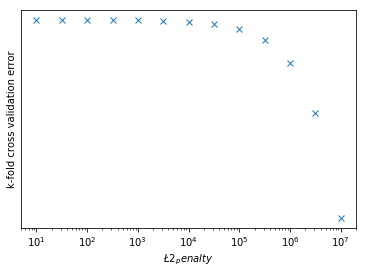

In [60]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.
#l2_penalty_mse = [10,24,34,55,100,340,440,1000,2400,3300,4400,7000,10000]
plt.plot(np.logspace(1,7,num=13),l2_penalty_mse,'x')
plt.xlabel('$\L2_penalty$')
plt.ylabel('k-fold cross validation error')
plt.xscale('log')
plt.yscale('log')


Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of `l2_penalty`. This way, your final model will be trained on the entire dataset.

In [61]:

final_model = polynomial_ridge_regression(x_train_valid_shuffled, 15, y_train_valid_shuffled, 10000)
final_model.coef_

C:\Users\Srikanth\AppData\Local\conda\conda\envs\SRI\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.848261e-35
  overwrite_a=True).T


array([[ 5.76303628e+01, -1.25075558e-02,  2.29523478e-05,
        -2.21820216e-09, -6.62449019e-14,  8.04070455e-17,
        -1.20639168e-15,  1.68684649e-15,  2.71588238e-16,
        -1.28928597e-16, -5.66549583e-16,  1.42941132e-15,
         1.18674662e-15,  2.19254088e-16,  4.25816899e-17]])

Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty? ***

In [62]:
final_predictions = final_model.predict(polynomial_frame(x_test['sqft_living'], 15))
residuals = y_test - final_predictions
print (np.sum(residuals ** 2))

price    1.945430e+15
dtype: float64


In [ ]:
# its all about getting best regualrization factor  and then get it to ridge _regression with 
#predict with test data (polynomial_sframe) final residual sum of squares 